# CS547 Group 17
Carlos Cuellar, Yuncong Geng, Kangcheng Lin, Peter Thompson
## HW4

In [199]:
import os
import numpy as np
import pandas
import time
#import random
import matplotlib
import matplotlib.pyplot as plt
#import scipy.stats
#from sklearn.linear_model import LinearRegression

In [200]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import functional as F

In [201]:
# Define some plotting styles that we will use.
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

# Problem 2

In [202]:
def func_phi(n,x):
    return np.cos(2**n*x)

def func_phi_deri(n,x):
    return -2**n*np.sin(2**n*x)

def func_L(x):
    return np.exp(np.pi*x)

def func_L_deri(x):
    return np.pi*np.exp(np.pi*x)


## 1) calculate function terms

In [203]:
m1=10; m2=9; m3=8; x=5;
m = [1,m1,m2,m3]

phi = np.zeros(4);
phi[0] = x;
for i in range(1,4):
    phi[i] = func_phi(i,m[i]*phi[i-1])
    print('phi'+str(i),'\t', phi[i])
f5 = func_L(phi[-1])
print('f5', '\t', f5)

phi1 	 0.862318872287684
phi2 	 0.9314396336343251
phi3 	 -0.9969498826095378
f5 	 0.04362999409438706


## 2) calculate derivative terms

In [204]:
L_deri = func_L_deri(phi[3])
print('L\'','\t', L_deri)

phi_deri = np.zeros(4)
for i in np.arange(3,0,-1):
    phi_deri[i] = func_phi_deri(i,m[i]*phi[i-1]);
    print('phi'+str(i)+'\'','\t',  phi_deri[i])

L' 	 0.13706766892309244
phi3' 	 -0.6243553636744417
phi2' 	 1.455583505788131
phi1' 	 1.0127312822195176


## 3) final

In [205]:
dfdm = np.zeros(4)
dfdm[3] = L_deri*phi_deri[3]*phi[2];
dfdm[2] = L_deri*phi_deri[3]*m[3]*phi_deri[2]*phi[1];
dfdm[1] = L_deri*phi_deri[3]*m[3]*phi_deri[2]*m[2]*phi_deri[1]*x;
for i in range(1,4):
    print('df/ dm'+str(i),'=',dfdm[i])

df/ dm1 = -45.415147118982766
df/ dm2 = -0.8593337670338087
df/ dm3 = -0.07971161119116837


## 4) validation with pytorch

In [206]:
import torch
from torch.autograd import Variable
m1 = Variable(torch.tensor(10.0), requires_grad=True);
m2 = Variable(torch.tensor(9.0), requires_grad=True);
m3 = Variable(torch.tensor(8.0), requires_grad=True);

f = torch.exp(np.pi*torch.cos(m3*2**3*torch.cos(m2*2**2*torch.cos(2**1*m1*5))))
f.backward ( )
print('df/ dm1=', m1.grad.item())
print('df/ dm2=', m2.grad.item())
print('df/ dm3=', m3.grad.item())

df/ dm1= -45.40815353393555
df/ dm2= -0.8592014908790588
df/ dm3= -0.07969946414232254


# Problem 3

## 1) calcualte function terms

In [214]:
m1=10; m2=9; m3=8; 
b1=11; b2=19; b3=18;
x=5;
m = [1,m1,m2,m3];
b = [0,b1,b2,b3];
phi = np.zeros(4); phi[0] = x;
for i in range(1,4):
    phi[i] = func_phi(i,m[i]*phi[i-1]+b[i])
    print('phi'+str(i),'\t', phi[i])
#f5 = func_L(phi[-1])
#print('f5', '\t', f5)

phi1 	 -0.8667670910519801
phi2 	 0.6865321051692147
phi3 	 0.8485780548166594


## 2) calcualte derivative terms

In [216]:
L_deri = func_L_deri(phi[3])
print('L\'','\t', L_deri)

phi_deri = np.zeros(4)
for i in np.arange(3,0,-1):
    phi_deri[i] = func_phi_deri(i,m[i]*phi[i-1]+b[i]);
    print('phi'+str(i)+'\'','\t',  phi_deri[i])

L' 	 45.1782812869579
phi3' 	 4.232561663171462
phi2' 	 -2.908397960587722
phi1' 	 -0.9974263077927882


## 3) final

In [217]:
dfdm = np.zeros(4)
dfdm[3] = L_deri*phi_deri[3]*phi[2];
dfdm[2] = L_deri*phi_deri[3]*m[3]*phi_deri[2]*phi[1];
dfdm[1] = L_deri*phi_deri[3]*m[3]*phi_deri[2]*m[2]*phi_deri[1]*x;
for i in range(1,4):
    print('df/ dm'+str(i),'=',dfdm[i])

df/ dm1 = 199696.36060610693
df/ dm2 = 3856.3747566865404
df/ dm3 = 131.2785739855426


## 4) validation with pytorch

In [210]:
import torch
from torch.autograd import Variable
m1 = Variable(torch.tensor(10.0), requires_grad=True);
b1 = Variable(torch.tensor(11.0), requires_grad=True);
m2 = Variable(torch.tensor(9.0), requires_grad=True);
b2 = Variable(torch.tensor(19.0), requires_grad=True);
m3 = Variable(torch.tensor(8.0), requires_grad=True);
b3 = Variable(torch.tensor(18.0), requires_grad=True);

f = torch.exp(np.pi*torch.cos(2**3*(m3*torch.cos(2**2*(m2*torch.cos(2**1*(m1*5+b1))+b2))+b3)));
f.backward ( )
print('df/ dm1=', m1.grad.item())
print('df/ dm2=', m2.grad.item())
print('df/ dm3=', m3.grad.item())

df/ dm1= 199695.640625
df/ dm2= 3856.360595703125
df/ dm3= 131.27757263183594


# Problem 4

df5/ dm1	-45.28855509500218
df5/ dm2	-0.8592884434555081
df5/ dm3	-0.07971122387151475


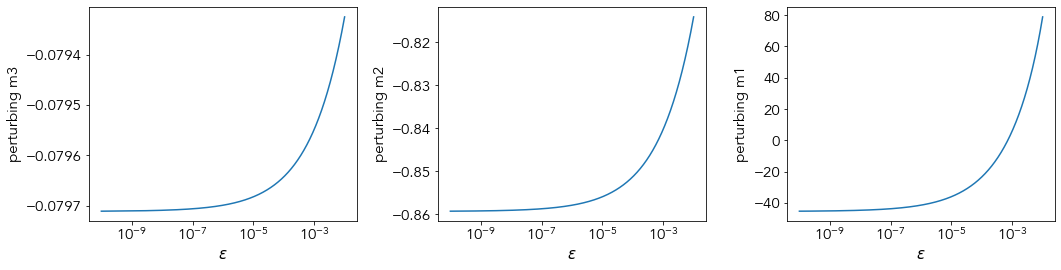

In [137]:
def f5(m1,m2,m3):
    return np.exp(np.pi*func_phi(3,m3*func_phi(2,m2*func_phi(1,m1*x))))

m1=10; m2=9; m3=8; x=5;
N_epsilon = 10000;

deriv = np.zeros((3,N_epsilon));
i = 0;

for epsilon in np.logspace(-4, -7, num=N_epsilon):
    deriv[0,i] = (f5(m1,m2,m3+epsilon)-f5(m1,m2,m3))/epsilon; 
    deriv[1,i] = (f5(m1,m2+epsilon,m3)-f5(m1,m2,m3))/epsilon; 
    deriv[2,i] = (f5(m1+epsilon,m2,m3)-f5(m1,m2,m3))/epsilon;
    i = i+1;
    
plt.rcParams["figure.figsize"] = (15,4)
plt.rcParams.update({'font.size': 15})
for j in range(0,3):
    plt.subplot(1,3,j+1)
    plt.plot(np.logspace(-2, -10, num=N_epsilon), deriv[j,:])
    plt.xscale('log')
    plt.xlabel(r'$\epsilon$')
    plt.ylabel('perturbing m'+str(3-j))
plt.tight_layout()

for j in np.arange(2,-1,-1):
    print('df5/ dm'+str(3-j)+'\t'+str(deriv[j,-1]))